# Supervised Learning : Regression task

## Context 

The California Housing dataset represents data collected from the 1990 California census. It's often used in machine learning for practicing regression algorithms, as the goal is typically to predict the median house value in different districts, given a number of features from those districts.

In our activity, we are simulating the role of a data scientist who is tasked with predicting house prices in California. This is an important task as it could inform a variety of stakeholders. For example, real estate investors may be interested in this model to identify undervalued areas, while government agencies may use it to inform policy decisions or identify areas in need of investment.

The dataset has nine features: median income, housing average age, average rooms, average bedrooms, population, average occupation, latitude, and longitude. We are predicting the median house value.

Our goal in this exercise is to train a linear regression model that can accurately predict the median house value based on these features. Before we train our model, we'll need to preprocess the data by filling in missing values and scaling the features.

Once our model is trained, we'll evaluate its performance using the Mean Squared Error (MSE) and R² score. These metrics will give us insight into how well our model performs and whether it's ready to be deployed in a real-world application, or if it needs further tuning.

## Import necessary libraries and modules

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing # To load the California housing dataset

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression # For the linear regression model.
from sklearn.metrics import mean_squared_error, r2_score # For evaluating our model.

from sklearn.preprocessing import StandardScaler # For scaling our features, requirement for linear regression model

In this step, we import all the necessary Python libraries. Pandas and numpy are used for data manipulation, sklearn for machine learning tasks, and matplotlib and seaborn for data visualization.

# Data exploration

## 1. Load the California Housing dataset

In [3]:
# fetches the California housing dataset
california_dataset = fetch_california_housing()

### Understanding the Data

In [3]:
california_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

- **Target name**

In [4]:
california_dataset.target_names

['MedHouseVal']

- **Features names**

In [5]:
california_dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

- **Data Set Characteristics**

In [6]:
# description of the dataset
print(california_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

### Convert the data to a DataFrame

In [4]:
# Convert the data to a DataFrame
df = pd.DataFrame(california_dataset.data, columns=california_dataset.feature_names)
df['MedianHouseValue'] = california_dataset.target

We create a pandas DataFrame from the data and name our columns using the feature names provided in the dataset (to facilitate easier data manipulation). 

Then, we add a new column `MedianHouseValue` which is our target variable to predict.

In [8]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedianHouseValue  
0    -122.23             4.526  
1    -122.22             3.585  
2    -122.24             3.521  
3    -122.25             3.413  
4    -122.25             3.422

## 2. Exploratory Data Analysis

In [71]:
#sns.pairplot(df)

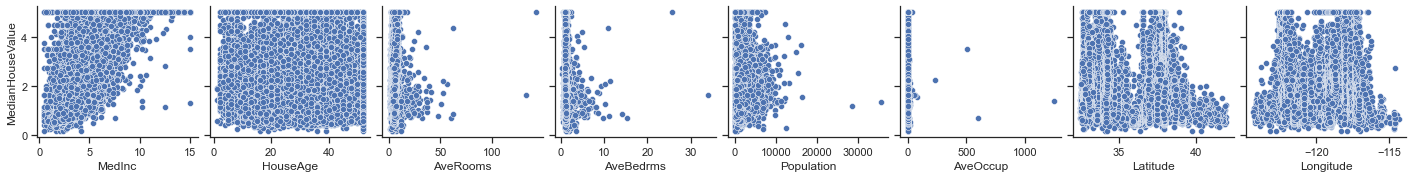

In [9]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, y_vars=["MedianHouseValue"], x_vars=california_dataset.feature_names)
plt.show()

We create a pairplot which shows scatterplots between our chosen target variable (MedianHouseValue) and every feature in the dataset. This helps us visualize the relationship between the target and the features.

- **Correlation**

Correlation is a statistical measure that describes the degree to which two variables move in relation to each other. In other words, it tells us how much one variable tends to change when the other one does.

In the context of linear regression, correlation plays a key role in understanding the relationship between the independent and dependent variables.

Here's how correlation is important in linear regression:

- **Strength of relationship:** The correlation coefficient indicates how strongly the independent and dependent variables are related. A correlation coefficient near 1 or -1 indicates a strong linear relationship, meaning that changes in the independent variable are likely to be associated with substantial changes in the dependent variable.

- **Direction of relationship** The sign of the correlation coefficient suggests the direction of the relationship. A positive correlation indicates that the dependent and independent variables tend to increase or decrease together. A negative correlation suggests that as one variable increases, the other tends to decrease.

- **Model appropriateness** High absolute correlation is an indication that linear regression could be a suitable modeling technique. If there's no correlation (i.e., the correlation coefficient is close to zero), then a linear regression model may not be appropriate because it implies there's no linear relationship between the variables.

- **Multicollinearity:** In multiple linear regression (with more than one independent variable), we often check the correlations between independent variables. If two independent variables are highly correlated (a condition known as multicollinearity), it can make it difficult to determine the effect of each variable on the dependent variable. This can lead to unstable estimates of the model coefficients and make interpretation difficult.

However, it's important to remember that correlation is a measure of linear relationship, and some variables may be related in non-linear ways. Therefore, a low correlation doesn't always mean that there's no relationship between variables. Also, as always, correlation does not imply causation – a regression model simply shows how variables are related, not whether one variable's changes cause the other's.

In [6]:
df.corr()

MedInc  HouseAge  AveRooms  AveBedrms  Population  \
MedInc            1.000000 -0.119034  0.326895  -0.062040    0.004834   
HouseAge         -0.119034  1.000000 -0.153277  -0.077747   -0.296244   
AveRooms          0.326895 -0.153277  1.000000   0.847621   -0.072213   
AveBedrms        -0.062040 -0.077747  0.847621   1.000000   -0.066197   
Population        0.004834 -0.296244 -0.072213  -0.066197    1.000000   
AveOccup          0.018766  0.013191 -0.004852  -0.006181    0.069863   
Latitude         -0.079809  0.011173  0.106389   0.069721   -0.108785   
Longitude        -0.015176 -0.108197 -0.027540   0.013344    0.099773   
MedianHouseValue  0.688075  0.105623  0.151948  -0.046701   -0.024650   

                  AveOccup  Latitude  Longitude  MedianHouseValue  
MedInc            0.018766 -0.079809  -0.015176          0.688075  
HouseAge          0.013191  0.011173  -0.108197          0.105623  
AveRooms         -0.004852  0.106389  -0.027540          0.151948  
AveBedrms        -0.006181  0.069721   0.013344         -0.046701  
Population        0.069863 -0.108785   0.099773         -0.024650  
AveOccup          1.000000  0.002366   0.002476         -0.023737  
Latitude          0.002366  1.000000  -0.924664         -0.144160  
Longitude         0.002476 -0.924664   1.000000         -0.045967  
MedianHouseValue -0.023737 -0.144160  -0.045967          1.000000

In [9]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr())
plt.show()

In [10]:
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  MedianHouseValue  
count  20640.000000  20640.000000  20640.000000      20640.000000  
mean       3.070655     35.631861   -119.569704          2.068558  
std       10.386050      2.135952      2.003532          1.153956  
min        0.692308     32.540000   -124.350000          0.149990  
25%        2.429741     33.930000   -121.800000          1.196000  
50%        2.818116     34.260000   -118.490000          1.797000  
75%        3.282261     37.710000   -118.010000          2.647250  
max     1243.333333     41.950000   -114.310000          5.000010

## 3. Data Cleaning and Preprocessing

#### **Missing value**

In [10]:
df.isna().sum()

MedInc              0
HouseAge            0
AveRooms            0
AveBedrms           0
Population          0
AveOccup            0
Latitude            0
Longitude           0
MedianHouseValue    0
dtype: int64

No missing values in the data

#### **Feature Scaling**

Feature scaling is a method used to standardize the range of features of data. In other words, it's a way to get all your data on the same scale. This makes it easier for machine learning algorithms to learn.

For example, an income range of 0 to 10,000 dollars might overshadow an age range of 0 to 100 years in some algorithms.

To prevent this, we use feature scaling. There are a few different methods:

- **Normalization (or Min-Max Scaling):** This method scales all features to a fixed range between 0 and 1. It subtracts the minimum value of the feature and then divides by the range of the feature (maximum - minimum).

In our example, the age would still range from 0 to 1 (e.g., 50 years old would become 0.5), and the income would also range from 0 to 1 (e.g., $5000 would become 0.5). Now, both features are on the same scale.

- **Standardization:** This method subtracts the mean (average) value of the feature and then divides by the standard deviation, which is a measure of variation in the data. The result is that the features will have a mean of 0 and a standard deviation of 1. This doesn't bound values to a specific range as with normalization, and negative values can appear.


**Note:** 
Feature scaling is essential for algorithms that use a distance measure (like k-Nearest Neighbors, or KNN), and it can significantly improve performance for neural networks and algorithms that use gradient descent(like linear regression). 

However, not all algorithms require feature scaling. For example, decision trees and random forests are not affected by the scale of the data.


In [11]:
# We will use standard scaling
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [12]:
df_scaled.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  2.064000e+04  2.064000e+04  2.064000e+04  2.064000e+04  2.064000e+04   
mean   3.734255e-16  8.557001e-16  2.704111e-16 -1.531384e-16 -6.465442e-17   
std    1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00   
min   -1.774299e+00 -2.196180e+00 -1.852319e+00 -1.610768e+00 -1.256123e+00   
25%   -6.881186e-01 -8.453931e-01 -3.994496e-01 -1.911716e-01 -5.638089e-01   
50%   -1.767951e-01  2.864572e-02 -8.078489e-02 -1.010650e-01 -2.291318e-01   
75%    4.593063e-01  6.643103e-01  2.519615e-01  6.015869e-03  2.644949e-01   
max    5.858286e+00  1.856182e+00  5.516324e+01  6.957171e+01  3.025033e+01   

           AveOccup      Latitude     Longitude  MedianHouseValue  
count  2.064000e+04  2.064000e+04  2.064000e+04      2.064000e+04  
mean   6.064808e-19  1.256263e-15 -6.527810e-15      1.466140e-15  
std    1.000024e+00  1.000024e+00  1.000024e+00      1.000024e+00  
min   -2.290000e-01 -1.447568e+00 -2.385992e+00     -1.662641e+00  
25%   -6.171062e-02 -7.967887e-01 -1.113209e+00     -7.561633e-01  
50%   -2.431585e-02 -6.422871e-01  5.389137e-01     -2.353337e-01  
75%    2.037453e-02  9.729566e-01  7.784964e-01      5.014973e-01  
max    1.194191e+02  2.958068e+00  2.625280e+00      2.540411e+00

# I. Simple Linear Regression

For this example, we'll simplify the task by using only one feature to predict the median house value, making it a simple linear regression problem. Let's choose the 'Median Income' as our feature as it is usually a good predictor of housing prices.

## 1. Choose one feature and split the data

- Use 'Median Income' as the feature :

We choose the feature 'MedInc' (median income in block group) for our simple linear regression model.

In [50]:
# we'll use the scaled data
X = df_scaled[['MedInc']]
y = df_scaled['MedianHouseValue']

Here we're creating our feature set **X** (input) which consists only of 'Median Income', and our target **y** which is 'Median House Value'.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

This splits our data into training and testing sets. We use 80% of our data for training and 20% for testing. The random_state is set for reproducibility of results.

## 2. Train the Linear Regression model

In [52]:
# Create the linear regression model
model = LinearRegression()
# Fit the model in training set
model.fit(X_train, y_train)

LinearRegression()

We initialize a LinearRegression model and fit it to our training data. This is where the model learns the relationship between the feature and the target variable.

Mathematically, the model can be expressed as : 

`MedianHouseValue` = β0 + β1 * `MedInc` + ϵ

- β0 is the y-intercept
- β1 is the slope of the line (coefficient of X)
- ϵ  is the residual error

The β0 and β1 are learned from the data by the model.

## 3. Interpreting Model's Coefficients

In [18]:
print('Intercept of the model: \n', model.intercept_)

Intercept of the model: 
 0.0013653338787560356


This the β0 value estimated by our model

In [19]:
print('Coefficient: \n', model.coef_)

Coefficient: 
 [0.69199894]


This is the β1 value learned by our model.

The coefficient or the slope in the simple linear regression model represents the relationship between the independent variable and the dependent variable.

In our case, we have a single coefficient because we are dealing with simple linear regression (i.e., only one feature - `Median Income`).

The mathematical expression of our model, therefore, incorporating the β0 (intercept) and β1 (coefficient) values, can be written as:

`MedianHouseValue` = 0.00136 + 0.691 * `MedInc` + ϵ

The coefficient tells us how much the dependent variable (`MedianHouseValue`) is expected to increase when the independent variable (`MedInc`) increases by one.

For example, if our model's coefficient for `Median Income` is 0.7, this means that for each unit increase in median income, we expect the median house value to increase by 0.7 units.

**Note :** It's important to note that this interpretation assumes that the relationship between `Median Income` and `Median House Value` is linear, which may not always be the case in real-world data. Other factors that are not included in our model could also influence the house value.

## 4. Make predictions using the testing set

In [53]:
# Calculate prediction
y_pred = model.predict(X_test)

Here we're using our trained model to make predictions on our testing data.

In [29]:
y_pred

array([ 0.10376741,  0.69669839,  0.17548882, ..., -0.24194509,
        0.82928647, -0.19462863])

#### Example of Predicting a New Value

Our model has learned from the data and determined the coefficient for Median Income to be 0.691, and the intercept to be 0.00136.

Now, suppose we encounter a new neighborhood (new block) where the `median income` is **2.37** (note that the median income is scaled and capped, with the actual income value being in tens of thousands of dollars).

Our linear regression model can predict the median house value for this neighborhood using the following equation:

`predicted_median_house_value` = 0.00136 + 0.691 * 2.37

Let's carry out this calculation using Python:

In [33]:
# Define the intercept and the coefficient 
intercept = 0.00136
coefficient = 0.691

# The new block's median income
median_income_new = 2.37

# Make a prediction for the median house value
predicted_median_house_value = intercept + (coefficient * median_income_new) 

print("The predicted median house value is :", predicted_median_house_value)

The predicted median house value is : 1.63903


- **Checking the predicted value by our model using an example from the test set**

Let's choose a real value of `median income` in our X_test 

In [55]:
X_test.head()

MedInc
14740  0.147980
10101  1.004818
20566  0.251624
2670  -0.747231
15709  0.597033

For example, choose the first value

In [56]:
X_test.loc[14740]

MedInc    0.14798
Name: 14740, dtype: float64

In [60]:
# Define the intercept and the coefficient 
intercept = 0.00136
coefficient = 0.691

# The new block's median income : The first value of our X_test
median_income_new = 0.14798

# Make a prediction for the median house value
predicted_median_house_value = intercept + (coefficient * median_income_new)

print("The predicted median house value is :", predicted_median_house_value)

The predicted median house value is : 0.10361417999999999


The predicted value is 0.1036 and it is the same value calculated by our model (there is a small difference in the decimal part because we did not take all the decimals of the intercept and the coefficient).

In [61]:
# Predicted value by the model
y_pred[0]

0.1037674063886034

**Note:**

In the context of making predictions using a trained machine learning model, we don't explicitly consider the error term because it represents the residuals or the difference between the observed and predicted values from the training data, which is not known or applicable for new, unseen data.

Remember, the error term is used in the training phase to update the model parameters and minimize the difference between the predicted and actual values. This process is done iteratively using an optimization algorithm such as gradient descent.

However, when we make predictions on new data, we only use the learned coefficients (and the intercept) to make a prediction. We do not have the true value for this new data (that's why we're making a prediction), so there is no error term to add or subtract.

Keep in mind that a well-trained model should have learned coefficients that minimize the error term on average, which is why we don't need to consider it when making new predictions.

## 5. Evaluate the model

In [34]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}, R²: {r2:.2f}')

MSE: 0.54, R²: 0.45


- **MSE**

The MSE (Mean Squared Error) gives us a measure of how close our predictions are to the actual values. 

**The smaller the MSE, the better our model.**

- **R²**

The **R²** score gives us a measure of how well our model performs compared to a model that always predicts the average house value. 

An R² score of 1 indicates that our model explains all the variability of the target variable around its mean. 

**The closer the R² score is to 1, the better our model.**

## 6. Visualize the model

In [39]:
type(X_test)

pandas.core.frame.DataFrame

In [40]:
type(y_pred)

numpy.ndarray

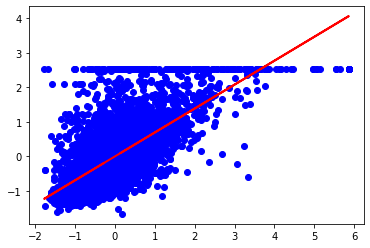

In [62]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test.squeeze(), y_pred, color='red', linewidth=2)
plt.show()

Finally, we plot the test data points as a scatter plot, and the predicted regression line. This visualization helps us understand the fit of our model on the test data.

The plot provides a visual representation of this fit.

**Note:** 

This is a very basic example. In a real-world scenario, you would likely need to do more extensive data cleaning, feature engineering, and model tuning to achieve good results.

# II. Multiple linear Regression

In a multiple linear regression, we use more than one feature to predict the target variable. 

In this part, instead of just using 'Median Income' as our feature, we use all the features in the dataset (median income, housing average age, average rooms, average bedrooms, population, average occupation, latitude, and longitude) to predict the median house value.

The remainder of the code remains the same - we still split our data into training and testing sets, train a linear regression model, make predictions, and evaluate our model.

## 1. Choose multiple features and split the data

We're using all available features to predict the median house value. We do this by dropping the `MedianHouseValue` column from our dataframe to create our feature set **X**.

In [68]:
# Use all features
X = df_scaled.drop('MedianHouseValue', axis=1)
y = df_scaled['MedianHouseValue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 2. Train the Linear Regression model

In [69]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [74]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedianHouseValue'],
      dtype='object')

We create a Linear Regression model and train it on our training data. This is the same step as in simple linear regression.

Mathematically, the model can be expressed as : 

`MedianHouseValue` = β0 + β1 * `MedInc` + β2 * `HouseAge`+ β3 * `AveRooms` + β4 * `AveBedrms` + β5 * `Population` + β6 * `AveOccup` + β7 * `Latitude` + β8 * `Longitude`+ ϵ

where:
 
- Y is the dependent variable.
- X1, X2, ..., Xn are the independent variables.
- β0 is the y-intercept.
- β1, β2, ..., β8 are the coefficients of X1, X2, ..., X8, respectively.
- ϵ is the residual error

The β parameters (β1, β2, ..., β8) are learned from the data by the model.

## 3. Make predictions using the testing set

We use the trained model to make predictions on our testing data. These predictions are then used to evaluate the model.

In [70]:
# Calculate prediction
y_pred = model.predict(X_test)

## 4. Show the model coefficients

In multiple linear regression, it can be useful to look at the coefficients of the model to understand the impact of each feature on the prediction. This code creates a new dataframe with the feature names and corresponding coefficients.

In [71]:
coeff_df = pd.DataFrame(model.coef_, california_dataset.feature_names, columns=['Coefficient'])
print(coeff_df)

            Coefficient
MedInc         0.713421
HouseAge       0.101356
AveRooms      -0.211499
AveBedrms      0.243624
Population    -0.007421
AveOccup      -0.042708
Latitude      -0.780095
Longitude     -0.753812


Each coefficient corresponds to one of our features. It represents the expected change in the median house value for each unit increase in that feature, holding all other features are held constant.

In [75]:
print('Intercept of the model: \n', model.intercept_)

Intercept of the model: 
 0.0018009175786551208


The mathematical expression of our model, therefore, incorporating the β values, can be written as:

`MedianHouseValue` = 0.0018 + 0.713421 * `MedInc` + 0.101356 * `HouseAge` - 0.211499 * `AveRooms` + 0.243624 * `AveBedrms` - 0.007421 * `Population` - 0.042708 * `AveOccup` - 0.780095 * `Latitude` - 0.753812 * `Longitude`+ ϵ

- **Coefficient interpretation**

Let's break down these coefficients one by one:

- `0.713421`: This is the coefficient for `MedInc` (Median income in block). It means that for each unit increase in `MedInc`, we expect the median house value to increase by 0.713 units, assuming all other variables are held constant.

- `0.101356`: This is the coefficient for `HouseAge` (Average age of houses in block). For each unit increase in `HouseAge`, we expect the median house value to increase by 0.101 units, all else being equal.

- `-0.211499`: This is the coefficient for `AveRooms` (Average number of rooms). A negative coefficient means that as this feature increases, the median house value decreases. So for each unit increase in `AveRooms`, we expect the median house value to decrease by 0.211 units, all else being equal.

- `0.243624`: This is the coefficient for `AveBedrms` (Average number of bedrooms). For each unit increase in `AveBedrms`, we expect the median house value to increase by 0.243 units, all else being equal.

- `-0.007421`: This is the coefficient for `Population`. For each unit increase in `Population`, we expect the median house value to decrease slightly (as indicated by the very small negative value 0.007), all else being equal.

- `-0.042708`: This is the coefficient for `AveOccup` (Average house occupancy). For each unit increase in `AveOccup`, we expect the median house value to decrease by 0.042 units, all else being equal.

- `-0.780095`: This is the coefficient for `Latitude`. For each unit increase in `Latitude`, we expect the median house value to decrease by 0.780 units, all else being equal.

- `-0.753812`: This is the coefficient for `Longitude`. For each unit increase in `Longitude`, we expect the median house value to decrease by 0.753 units, all else being equal.

Remember, these interpretations assume a linear relationship between each feature and the median house value, holding all other variables constant. In reality, this may not always be the case, but linear regression provides a simplified model of reality that can still be quite useful for prediction.

## 5. Evaluate the model

In [72]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}, R²: {r2:.2f}')

MSE: 0.40, R²: 0.59


Again, we use our trained model to make predictions on the test set, and evaluate its performance by calculating the Mean Squared Error and R² score.

## 6. Checking the Overfitting/Underfitting

- Checking the performance of our model on the training data

We first need to calculate the prediction from the X_train data and then evaluate the performance by MSE and R2. 

In [73]:
# Calculate prediction of training set 
y_pred_tr = model.predict(X_train)
# Evaluate model performance on training data
mse_tr = mean_squared_error(y_train, y_pred_tr)
r2_tr = r2_score(y_train, y_pred_tr)
print(f'MSE_tr: {mse_tr:.2f}, R²_tr: {r2_tr:.2f}')

MSE_tr: 0.39, R²_tr: 0.61


- Interpretation

Observing that the performance metrics for both the training and test datasets are quite similar indicates a well-fitted model. In this scenario, there doesn't seem to be a concern for overfitting or underfitting issues.

- **Notes :**

In multiple regression, we cannot visualize the regression line as we did in simple linear regression, because we are now in a higher-dimensional space. However, we could visualize the relationship between the target and each individual feature.

Remember that multiple linear regression assumes that there is a **linear relationship between the features and the target variable**, and that the **features are not highly correlated with each other**. If these assumptions are violated, the model's predictions may be inaccurate. **Always make sure to check these assumptions when using multiple linear regression**.